# Excersise 1

Implementation of Barbasi-Albert algorithm.

In [1]:
v0 = 4
end_time = 1000 #how many iteration will be (V = 50 + 1)
number_of_new_edges = 2

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt

"""
end_time  – końcowa liczba wierzchołków,
v0 – liczba początkowych wierzchołków (v0 ≥ number_of_new_edges),
number_of_new_edges  – ile krawędzi dodajemy przy każdym nowym wierzchołku.
"""

# 1: graf startowy – pełny graf v0
G = {i: set() for i in range(v0)}
for i in range(v0):
    for j in range(i + 1, v0):
        G[i].add(j)
        G[j].add(i)

# Lista pomocnicza: każdy węzeł występuje tyle razy, ile wynosi jego stopień.
# Pozwala to losować z prawdopodobieństwem proporcjonalnym do stopnia.
degree_list = []
for node, neigh in G.items():
    degree_list += [node] * len(neigh)

# 2: iteracyjne dodawanie nowych węzłów
for new_node in range(v0, end_time):
    G[new_node] = set()

    # Wybór m unikalnych węzłów proporcjonalnie do stopnia
    targets = set()
    while len(targets) < number_of_new_edges:
        targets.add(random.choice(degree_list))

    # Dodawanie krawędzi
    for t in targets:
        G[new_node].add(t)
        G[t].add(new_node)

    # Aktualizacja degree_list
    degree_list += [new_node] * number_of_new_edges
    for t in targets:
        degree_list.append(t)




In [3]:
G

{0: {1,
  2,
  3,
  5,
  7,
  8,
  10,
  17,
  22,
  26,
  33,
  49,
  54,
  76,
  87,
  104,
  117,
  153,
  200,
  268,
  296,
  302,
  359,
  367,
  394,
  481,
  517,
  571,
  597,
  722,
  740,
  787,
  838},
 1: {0,
  2,
  3,
  4,
  6,
  8,
  9,
  11,
  12,
  14,
  15,
  19,
  27,
  29,
  33,
  34,
  41,
  42,
  45,
  47,
  50,
  52,
  57,
  58,
  59,
  62,
  67,
  70,
  72,
  83,
  85,
  91,
  92,
  97,
  121,
  140,
  172,
  173,
  176,
  183,
  186,
  187,
  191,
  193,
  200,
  204,
  205,
  229,
  241,
  246,
  271,
  289,
  292,
  294,
  299,
  311,
  313,
  323,
  336,
  337,
  352,
  364,
  367,
  381,
  382,
  389,
  394,
  403,
  404,
  457,
  461,
  471,
  512,
  513,
  516,
  517,
  562,
  567,
  619,
  638,
  678,
  684,
  689,
  703,
  789,
  793,
  861,
  862,
  868,
  891,
  902,
  909,
  920,
  928,
  941,
  953,
  963,
  987},
 2: {0,
  1,
  3,
  4,
  7,
  9,
  10,
  11,
  16,
  18,
  28,
  39,
  45,
  60,
  71,
  80,
  110,
  114,
  127,
  130,
  176,
  187,
  

# Excersise 2

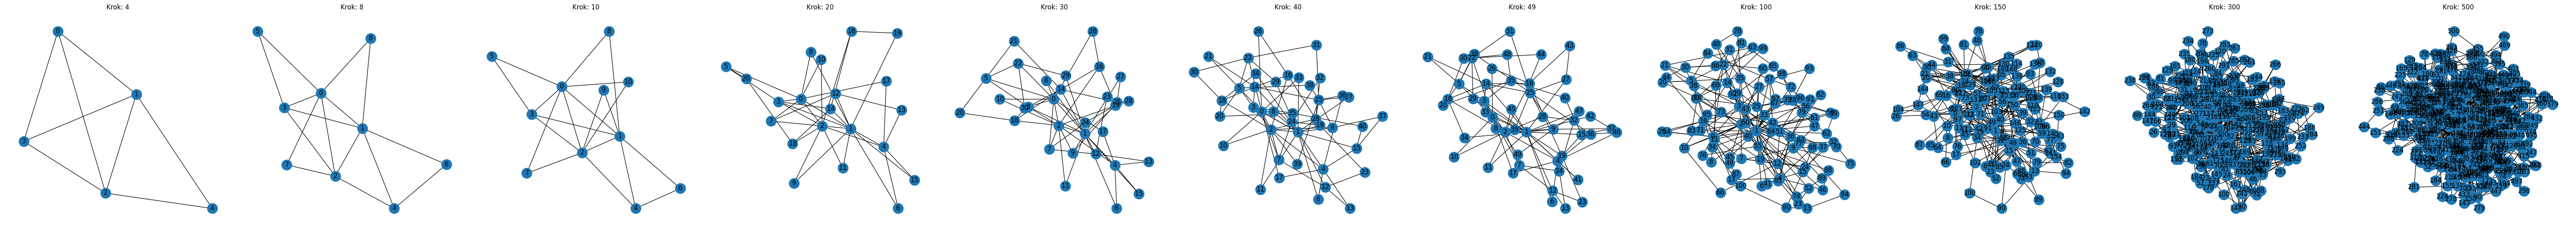

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_selected_frames(G, steps=[4, 8, 10, 20, 30, 40, 49, 100, 150, 300, 500], figsize=(6,6)):
    """
    G: słownik {node: set(neighbors)}
    steps: lista węzłów, po których iteracjach chcemy zrobić snapshot
    """
    G_graph = nx.Graph()
    pos_holder = None  # pozycje layoutu, żeby zachować spójność

    # sortujemy węzły po numerze
    frames = list(sorted(G.items(), key=lambda x: x[0]))
    
    fig, axes = plt.subplots(1, len(steps), figsize=(len(steps)*figsize[0], figsize[1]))
    
    if len(steps) == 1:
        axes = [axes]  # dla jednokolumnowego subplotu

    step_idx = 0
    for i, (node, neighbors) in enumerate(frames):
        # dodaj węzeł i krawędzie
        G_graph.add_node(node)
        for t in neighbors:
            if G_graph.has_node(t):
                G_graph.add_edge(node, t)

        # jeśli aktualny węzeł odpowiada krokowi do pokazania
        if i in steps:
            ax = axes[step_idx]
            ax.set_title(f"Krok: {i}")
            
            if pos_holder is None:
                pos_holder = nx.spring_layout(G_graph, seed=42)
            else:
                pos_holder = nx.spring_layout(G_graph, pos=pos_holder, iterations=5, seed=42)
            
            nx.draw(G_graph, pos_holder, ax=ax, with_labels=True, node_size=350)
            step_idx += 1

    plt.tight_layout()
    plt.show()
plot_selected_frames(G)

Wygenerowana animacja przy pomocy chatGPT

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image
def animate_graph_to_gif(G, filename="ba_animation.gif", interval=500):
    G_graph = nx.Graph()
    pos_holder = None
    frames = list(sorted(G.items(), key=lambda x: x[0]))
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    def update(frame):
        nonlocal pos_holder
        node, neighbors = frame
        G_graph.add_node(node)
        for t in neighbors:
            if G_graph.has_node(t):
                G_graph.add_edge(node, t)
        
        ax.clear()
        ax.set_title(f"Krok: {node}")
        if pos_holder is None:
            pos_holder = nx.spring_layout(G_graph, seed=42)
        else:
            pos_holder = nx.spring_layout(G_graph, pos=pos_holder, iterations=5, seed=42)
        
        nx.draw(G_graph, pos_holder, ax=ax, with_labels=True, node_size=350)
    
    ani = FuncAnimation(fig, update, frames=frames, interval=interval, repeat=False)
    
    # zapisanie animacji do GIF
    ani.save(filename, writer=PillowWriter(fps=2))
    plt.close(fig)  # zamykamy figurę, żeby VSCode nie blokował
    
    # wyświetlenie w notebooku
    return Image(filename)


# --- 4. Tworzymy animację i wyświetlamy GIF ---
animate_graph_to_gif(G, filename="ba_animation.gif", interval=300)

# Excersise 3

In [6]:
def degree_distribution(G, up_to=None):
    """
    G: dict {node: set(neighbors)}
    up_to: int, consider only nodes <= up_to-1
    Returns: list of degrees
    """
    if up_to is None:
        nodes = G.keys()
    else:
        nodes = [node for node in G.keys() if node < up_to]
    
    degrees = [len(G[node]) for node in nodes] # count deegree of each node based on the length of each key value
    return degrees


In [7]:
def plot_degree_histogram(G, t=None, title=None):
    """
    G: dict graph
    t: number of nodes to consider (time t)
    """
    degrees = degree_distribution(G, up_to=t)
    
    plt.figure(figsize=(6,4))
    plt.hist(degrees, density=True, color='skyblue', edgecolor='black')
    plt.xlabel("Degree k")
    plt.ylabel("P(k)")
    if title is None:
        if t is None:
            plt.title("Degree distribution")
        else:
            plt.title(f"Degree distribution at t={t}")
    else:
        plt.title(title)
    plt.show()


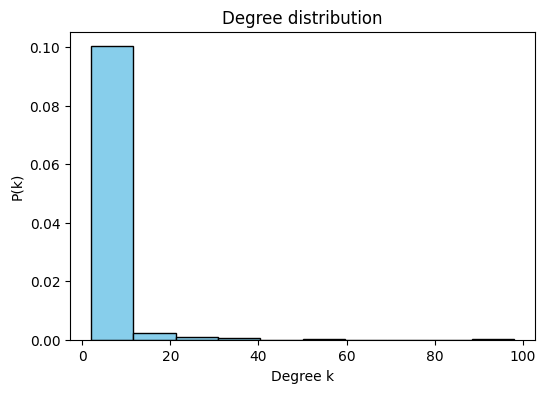

In [8]:
plot_degree_histogram(G)

In [22]:
def plot_degree_histogram2(G, t=None, title=None):
    degrees = degree_distribution(G, up_to=t)

    max_deg = max(degrees)

    # bins from 1 to max_deg, inclusive
    bins = range(1, max_deg + 2)  # +2 → last edge

    plt.figure(figsize=(6,4))
    plt.hist(degrees, bins=bins, align='left',
             color='skyblue', edgecolor='black', rwidth=0.9)

    #plt.xticks(range(1, max_deg + 1))  # tick labels start at 1

    plt.xlabel("Degree of node")
    plt.ylabel("Number of nodes")

    if title is None:
        title = "Degree distribution" if t is None else f"Degree distribution at t={t}"
    plt.title(title)

    plt.show()


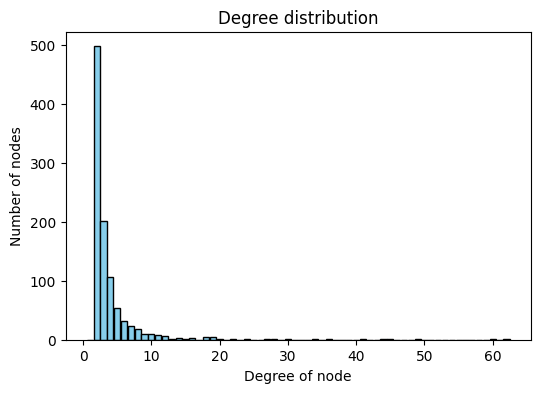

In [23]:
# Full graph at final time
plot_degree_histogram2(G)


In [11]:
x = [node for node in G.keys()]
y = [len(G[node]) for node in x]

Text(0, 0.5, 'Degree of vertex')

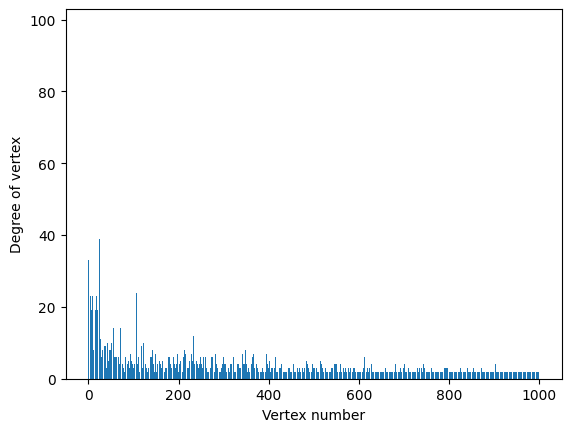

In [12]:
plt.bar(x, y)
plt.xlabel("Vertex number")
plt.ylabel("Degree of vertex")

Log - log ploy

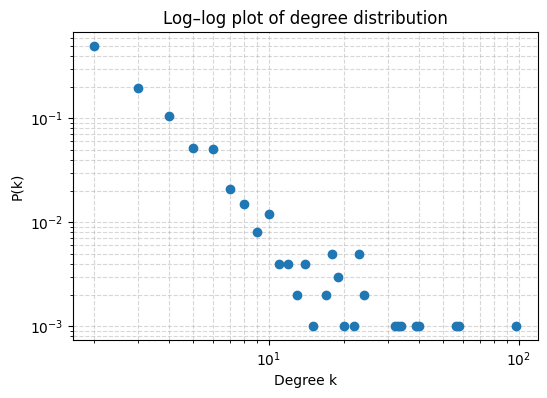

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def degree_distribution_pk(G, t=None):
    """
    Returns k values and P(k)
    """
    degrees = degree_distribution(G, up_to=t)
    N = len(degrees)

    counter = Counter(degrees)
    k_vals = np.array(sorted(counter.keys()))
    pk_vals = np.array([counter[k] / N for k in k_vals])

    return k_vals, pk_vals

k, pk = degree_distribution_pk(G)

plt.figure(figsize=(6,4))
plt.loglog(k, pk, 'o', markersize=6)
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.title("Log–log plot of degree distribution")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


# Excersise 4

In our lecture alfa coefficient is equal 1/2, cause: k_i(t) = m * sqrt(t/t_i), then k_i(t) ~ t ^(1/2).

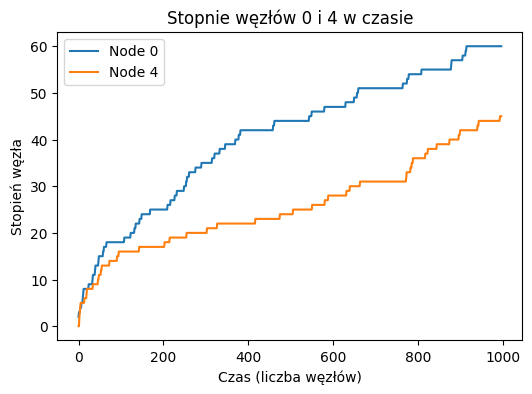

In [14]:
import random
import matplotlib.pyplot as plt

# parametry
v0 = 3
number_of_new_edges = 2
end_time = 1000

# 1: startowy pełny graf
G = {i: set() for i in range(v0)}
for i in range(v0):
    for j in range(i+1, v0):
        G[i].add(j)
        G[j].add(i)

# lista pomocnicza do preferential attachment
degree_list = []
for node, neigh in G.items():
    degree_list += [node]*len(neigh)

# listy do śledzenia stopni wybranych węzłów
deg_node0 = [len(G[0])]
deg_node4 = [len(G[4]) if 4 in G else 0]

# 2: iteracyjne dodawanie nowych węzłów
for new_node in range(v0, end_time):
    G[new_node] = set()
    
    # wybór m unikalnych węzłów
    targets = set()
    while len(targets) < number_of_new_edges:
        targets.add(random.choice(degree_list))
    
    # dodawanie krawędzi
    for t in targets:
        G[new_node].add(t)
        G[t].add(new_node)
    
    # aktualizacja degree_list
    degree_list += [new_node]*number_of_new_edges
    for t in targets:
        degree_list.append(t)
    
    # zapis stopni wybranych węzłów
    deg_node0.append(len(G[0]))
    deg_node4.append(len(G[4]) if 4 in G else 0)

# 3: wykres stopni w czasie
plt.figure(figsize=(6,4))
plt.plot(range(end_time-2), deg_node0, label="Node 0")
plt.plot(range(end_time-2), deg_node4, label="Node 4")
plt.xlabel("Czas (liczba węzłów)")
plt.ylabel("Stopień węzła")
plt.title("Stopnie węzłów 0 i 4 w czasie")
plt.legend()
plt.show()


In [15]:
times = [i for i in range(v0, end_time + 1)]

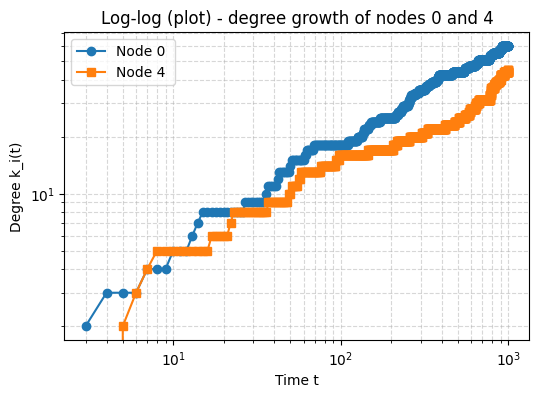

In [16]:
plt.figure(figsize=(6,4))
plt.loglog(times, deg_node0, 'o-', label="Node 0 ")
plt.loglog(times, deg_node4, 's-', label="Node 4 ")
plt.xlabel("Time t")
plt.ylabel("Degree k_i(t)")
plt.legend()
plt.title("Log-log (plot) - degree growth of nodes 0 and 4")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [17]:
import numpy as np

# node 0
mask0 = np.array(deg_node0) > 0
alpha0, _ = np.polyfit(
    np.log(np.array(times)[mask0]),
    np.log(np.array(deg_node0)[mask0]),
    1
)

# node 4
t4 = 5  # birth time
mask4 = (np.array(times) >= t4) & (np.array(deg_node4) > 0)
alpha4, _ = np.polyfit(
    np.log(np.array(times)[mask4]),
    np.log(np.array(deg_node4)[mask4]),
    1
)

print(f"alpha (node 0) ≈ {alpha0:.3f}")
print(f"alpha (node 4) ≈ {alpha4:.3f}")


alpha (node 0) ≈ 0.526
alpha (node 4) ≈ 0.449


γ ≈ 1.798


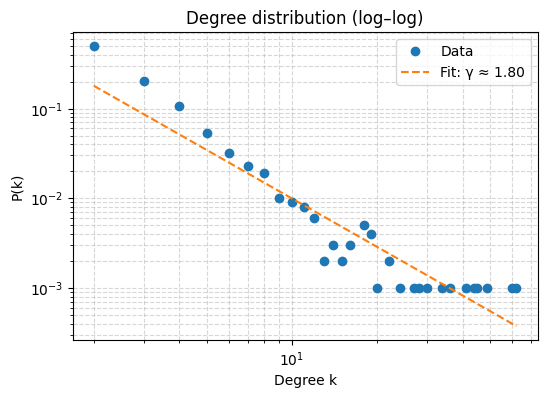

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

degrees = [len(G[node]) for node in G]
counts = Counter(degrees)

k = np.array(sorted(counts.keys()))
pk = np.array([counts[i] / len(degrees) for i in k])

# log–log fit (tail only)
k_min = 3
mask = k >= k_min

gamma, _ = np.polyfit(np.log(k[mask]), np.log(pk[mask]), 1)
gamma = -gamma

print(f"γ ≈ {gamma:.3f}")

plt.figure(figsize=(6,4))
plt.loglog(k, pk, 'o', label="Data")
plt.loglog(k, np.exp(np.polyfit(np.log(k[mask]), np.log(pk[mask]), 1)[1]) * k**(-gamma),
           '--', label=f"Fit: γ ≈ {gamma:.2f}")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.legend()
plt.title("Degree distribution (log–log)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


# Excersise 5

In [19]:
len(deg_node0)

998

In [20]:
import numpy as np
times = np.arange(1, end_time+1)
k_i = []
for i in times:
    k_i.append((number_of_new_edges * np.sqrt(len(times) / (i))))

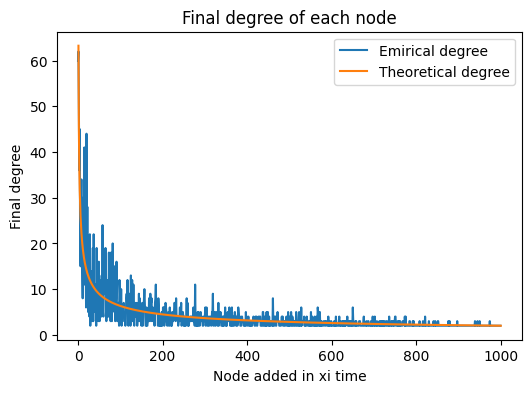

In [21]:
x = [node for node in G.keys()]
y = [len(G[node]) for node in x]

plt.figure(figsize=(6,4))
plt.plot(x, y, label = "Emirical degree")
plt.plot(times, k_i, label = "Theoretical degree")
plt.xlabel("Node added in xi time")
plt.ylabel("Final degree")
plt.title("Final degree of each node")
plt.legend()
plt.show()